In [2]:
import math

def abDistance(a, b):# calculate a and b distance  a[a緯, a經], b[b緯, b經]
    """
    兩點間距離D(x1,y1,x2,y2)=r×acos(sin(x1) ×sin(x2)+cos(x1) ×cos(x2) ×cos(y1-y2))
    x,y是緯度，經度的弧度單位，r是地球半徑
    """
    op = math.pi/180
        
    r = 6378.39
    return r*math.acos(math.sin(a[0]*op) * math.sin(b[0]*op) + 
                       math.cos(a[0]*op) * math.cos(b[0]*op) * math.cos(a[1]*op-b[1]*op))

In [3]:
from pymongo import MongoClient
import pprint
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mplPath
import urllib.request, json 


latitude = []
longitude = []

client = MongoClient('120.126.136.17',27017)
db = client['Tracker']
collection_leo = db['leo']
collection_james = db['james']
collection_dn2 = db['dn2']
collection_db2 = db['db2']
 
cursor_james = collection_james.find({})
cursor_leo = collection_leo.find({})
cursor_dn2 = collection_dn2.find({})
cursor_db2 = collection_db2.find({})

jsonData_james = [d for d in cursor_james]
jsonData_leo = [d for d in cursor_leo]
jsonData_dn2 = [d for d in cursor_dn2]
jsonData_db2 = [d for d in cursor_db2]

for x in jsonData_james:
    latitude.append(float(x['latitude']))
    longitude.append(float(x['longitude']))
for x in jsonData_leo:
    latitude.append(float(x['latitude']))
    longitude.append(float(x['longitude']))
for x in jsonData_dn2:
    latitude.append(float(x['latitude']))
    longitude.append(float(x['longitude']))
for x in jsonData_db2:
    latitude.append(float(x['latitude']))
    longitude.append(float(x['longitude']))
    

with urllib.request.urlopen("https://sheethub.com/ronnywang/%E9%84%89%E9%8E%AE%E5%B8%82%E5%8D%80%E8%A1%8C%E6%94%BF%E5%8D%80%E5%9F%9F%E7%95%8C%E7%B7%9A/uri/19260593?format=geojson") as url:
    data = json.loads(url.read().decode())

# from scipy.spatial import ConvexHull
boarderData = data['features'][0]['geometry']['coordinates'][0]

#draw the place
trainingset = np.array(boarderData)
# plt.plot(trainingset[:,0], trainingset[:,1], 'o')

#make out a path
borderPath = mplPath.Path(boarderData)

location = []
for x in range(len(latitude)):
    if borderPath.contains_points(np.array([[longitude[x], latitude[x]]])):       
        location.append([round(latitude[x],3), round(longitude[x],3)])

In [4]:
#remove outliers using mean and standard deviation
trainingset = np.array(location)
mean = np.mean(trainingset, axis=0)
sd = np.std(trainingset, axis=0)

final_list = [x for x in location if ((x[0] > mean[0] - 6 * sd[0])and(x[1] > mean[1] - 6 * sd[1]))]
final_list = [x for x in final_list if ((x[0] < mean[0] + 6 * sd[0])and(x[1] < mean[1] + 6 * sd[1]))]

trainingset = np.array(final_list)

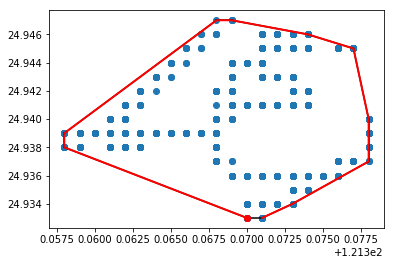

In [5]:
from scipy.spatial import ConvexHull
import numpy as np

plt.plot(trainingset[:,1], trainingset[:,0], 'o')

hull = ConvexHull(trainingset)
for simplex in hull.simplices:
    plt.plot(trainingset[simplex,1], trainingset[simplex, 0], 'k-')
    
plt.plot(trainingset[hull.vertices,1], trainingset[hull.vertices,0], 'r-', lw=2)
plt.plot(trainingset[hull.vertices[0],1], trainingset[hull.vertices[0],0], 'ro')
plt.show()

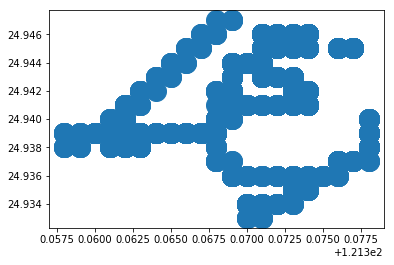

In [27]:
plt.plot(trainingset[:,1], trainingset[:,0], 'o', markersize=20)
plt.show()

In [18]:
count = {}# make a dictionary
for x in location:
    if tuple(x) in count:
        count[tuple(x)] += 1
    else:
        count[tuple(x)] = 1

In [131]:
count

{(24.9453, 121.3736): 2,
 (24.9454, 121.3736): 1,
 (24.9452, 121.3738): 10,
 (24.9452, 121.3737): 4,
 (24.9453, 121.3738): 33,
 (24.9454, 121.3738): 3,
 (24.9454, 121.3739): 2,
 (24.9455, 121.3739): 3,
 (24.9455, 121.374): 4,
 (24.9455, 121.3741): 1,
 (24.9456, 121.3741): 3,
 (24.9456, 121.3742): 2,
 (24.9457, 121.3742): 6,
 (24.945, 121.3719): 13,
 (24.945, 121.3718): 9,
 (24.9449, 121.3718): 76,
 (24.9449, 121.3717): 90,
 (24.9449, 121.3716): 114,
 (24.9448, 121.3716): 5,
 (24.9448, 121.3715): 20,
 (24.9448, 121.3714): 47,
 (24.9448, 121.3713): 35,
 (24.9448, 121.3712): 48,
 (24.9447, 121.3711): 38,
 (24.9447, 121.371): 12,
 (24.9447, 121.3709): 18,
 (24.9446, 121.3709): 12,
 (24.9446, 121.3708): 61,
 (24.9445, 121.3708): 4,
 (24.9445, 121.3707): 33,
 (24.9445, 121.3706): 77,
 (24.9445, 121.3705): 5,
 (24.9444, 121.3704): 72,
 (24.9444, 121.3703): 77,
 (24.9444, 121.3702): 54,
 (24.9443, 121.3702): 24,
 (24.9443, 121.3701): 83,
 (24.9443, 121.37): 61,
 (24.9442, 121.37): 18,
 (24.944